In [2]:
#Importing required libraries
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
#Importing data
df = pd.read_csv("data/customer_booking.csv", encoding="ISO-8859-1")
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


In [4]:
# Convert categorical columns to one-hot encoding
cat_columns = ["sales_channel", "trip_type", "route", "booking_origin"]
df_encoded = pd.get_dummies(df, columns=cat_columns)
df_encoded.head()

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,...,booking_origin_Timor-Leste,booking_origin_Tonga,booking_origin_Tunisia,booking_origin_Turkey,booking_origin_Ukraine,booking_origin_United Arab Emirates,booking_origin_United Kingdom,booking_origin_United States,booking_origin_Vanuatu,booking_origin_Vietnam
0,2,262,19,7,Sat,1,0,0,5.52,0,...,0,0,0,0,0,0,0,0,0,0
1,1,112,20,3,Sat,0,0,0,5.52,0,...,0,0,0,0,0,0,0,0,0,0
2,2,243,22,17,Wed,1,1,0,5.52,0,...,0,0,0,0,0,0,0,0,0,0
3,1,96,31,4,Sat,0,0,1,5.52,0,...,0,0,0,0,0,0,0,0,0,0
4,2,68,22,15,Wed,1,0,1,5.52,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
# Mapping flight_day to numbers
mapping = {"Mon": 1, "Tue": 2, "Wed": 3, "Thu": 4, "Fri": 5, "Sat": 6, "Sun": 7}
df_encoded["flight_day"] = df_encoded["flight_day"].map(mapping)

In [6]:
X = df_encoded.drop("booking_complete", axis=1)  # Input features
y = df_encoded["booking_complete"]  # Target variable

In [7]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
# Train a Random Forest model
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [9]:
# Evaluate the model
y_pred = model.predict(X_test)
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.87      0.98      0.92      8520
           1       0.53      0.14      0.22      1480

    accuracy                           0.85     10000
   macro avg       0.70      0.56      0.57     10000
weighted avg       0.82      0.85      0.82     10000



In [10]:
# Train a Random Forest model
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [11]:
# Evaluate the model
y_pred = model.predict(X_test)
classification_report = classification_report(y_test, y_pred)
print(classification_report)

              precision    recall  f1-score   support

           0       0.87      0.98      0.92      8520
           1       0.51      0.14      0.22      1480

    accuracy                           0.85     10000
   macro avg       0.69      0.56      0.57     10000
weighted avg       0.81      0.85      0.81     10000



In [12]:
# Feature Importance
importance = model.feature_importances_
feature_names = X.columns
sorted_indices = importance.argsort()[::-1]
sorted_importance = importance[sorted_indices]
sorted_feature_names = feature_names[sorted_indices]

In [13]:
print(model.get_params())

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


In [14]:
print(sorted_feature_names, sorted_importance)

Index(['purchase_lead', 'flight_hour', 'length_of_stay', 'flight_day',
       'num_passengers', 'flight_duration', 'booking_origin_Malaysia',
       'wants_in_flight_meals', 'booking_origin_Australia',
       'wants_preferred_seat',
       ...
       'route_KNOWUH', 'route_BBIPER', 'route_TPEVTE', 'route_BTUWUH',
       'route_DACPUS', 'route_DACPEK', 'route_JOGKTM', 'route_MELVTE',
       'route_JEDPDG', 'route_KOSSYD'],
      dtype='object', length=917) [1.55829935e-01 1.27219061e-01 1.14473546e-01 8.89216601e-02
 4.86918610e-02 3.37766335e-02 2.96787409e-02 2.22849113e-02
 1.99408058e-02 1.85542207e-02 1.70987715e-02 7.35605626e-03
 5.35404153e-03 4.78181141e-03 4.66326110e-03 4.54790768e-03
 4.43352397e-03 4.14399972e-03 3.93026602e-03 3.90547433e-03
 3.75106967e-03 3.61151571e-03 2.78286787e-03 2.61905603e-03
 2.59233290e-03 2.50559297e-03 2.30275060e-03 2.26417970e-03
 2.23501576e-03 2.22831148e-03 2.19281614e-03 2.06536335e-03
 2.01093450e-03 2.00936725e-03 2.00353639e-03 1.9980

In [15]:
from sklearn.metrics import confusion_matrix 
print(confusion_matrix(y_test, y_pred))

[[8323  197]
 [1276  204]]


In [16]:
# # Create a bar plot of feature importances
# plt.figure(figsize=(10, 6))
# plt.bar(sorted_feature_names, sorted_importance)
# plt.xlabel("Features")
# plt.ylabel("Importance")
# plt.title("Feature Importance")
# plt.xticks(rotation=90)
# plt.show()

In [17]:
for column in df.columns:
    print(column)

num_passengers
sales_channel
trip_type
purchase_lead
length_of_stay
flight_hour
flight_day
route
booking_origin
wants_extra_baggage
wants_preferred_seat
wants_in_flight_meals
flight_duration
booking_complete


Visualizations starts here

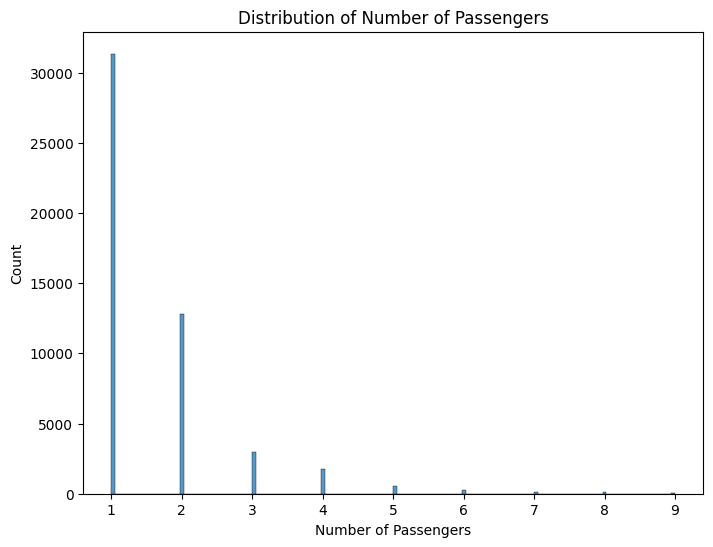

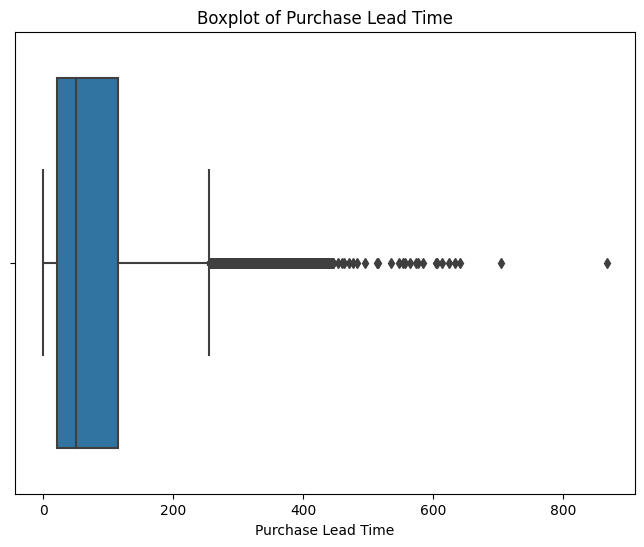

In [18]:
# Histogram
plt.figure(figsize=(8, 6))
sns.histplot(df["num_passengers"])
plt.xlabel("Number of Passengers")
plt.ylabel("Count")
plt.title("Distribution of Number of Passengers")
plt.show()

# Boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x="purchase_lead")
plt.xlabel("Purchase Lead Time")
plt.title("Boxplot of Purchase Lead Time")
plt.show()


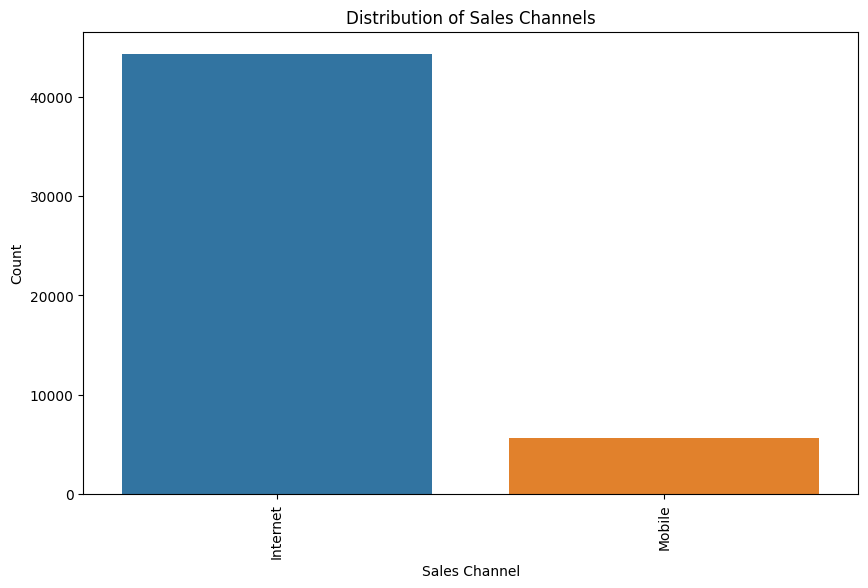

In [19]:
# Bar plot for categorical variables
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x="sales_channel")
plt.xlabel("Sales Channel")
plt.ylabel("Count")
plt.title("Distribution of Sales Channels")
plt.xticks(rotation=90)
plt.show()


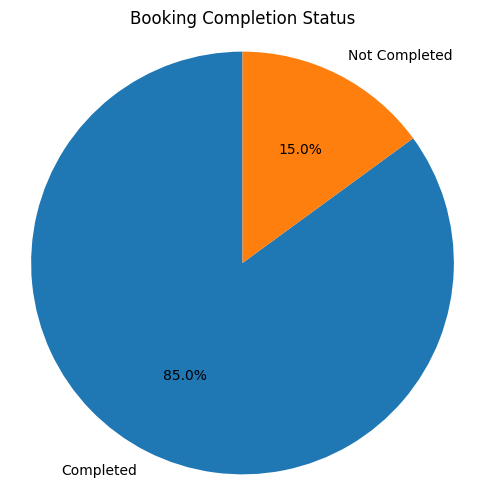

In [20]:
# Pie chart for booking completion
booking_complete_counts = df["booking_complete"].value_counts()
labels = ["Completed", "Not Completed"]
plt.figure(figsize=(6, 6))
plt.pie(booking_complete_counts, labels=labels, autopct="%1.1f%%", startangle=90)
plt.title("Booking Completion Status")
plt.axis("equal")
plt.show()


C:\Users\ahmad\AppData\Local\Temp\ipykernel_13508\2604397424.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


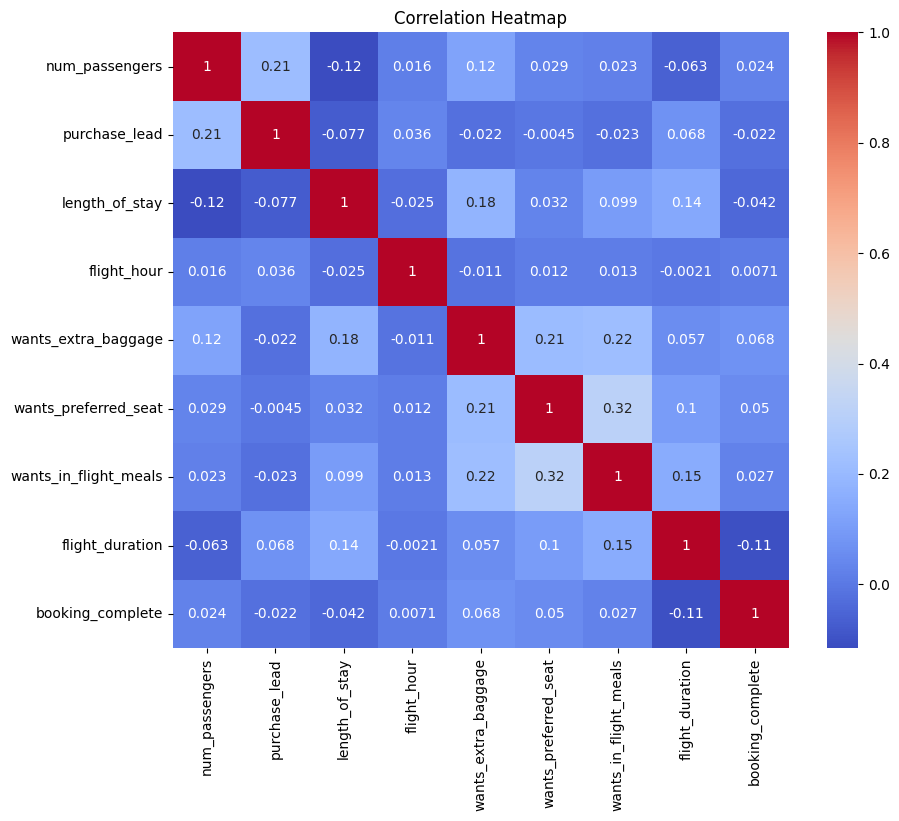

In [21]:
# Calculate correlation matrix
correlation_matrix = df.corr()

# Plot correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", square=True)
plt.title("Correlation Heatmap")
plt.show()


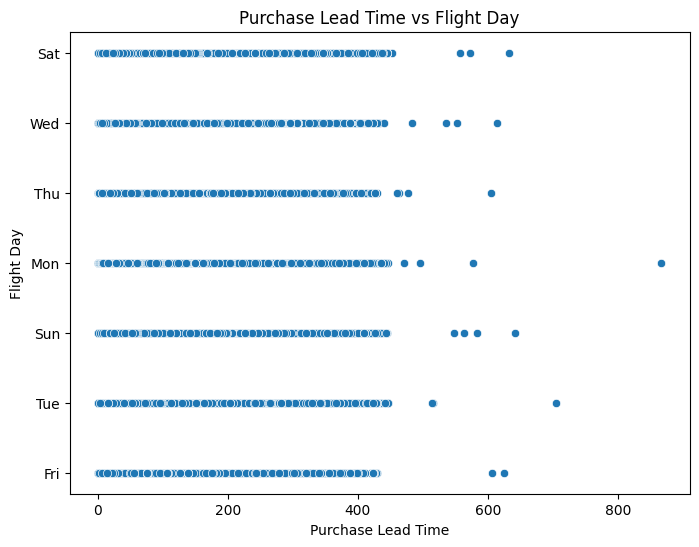

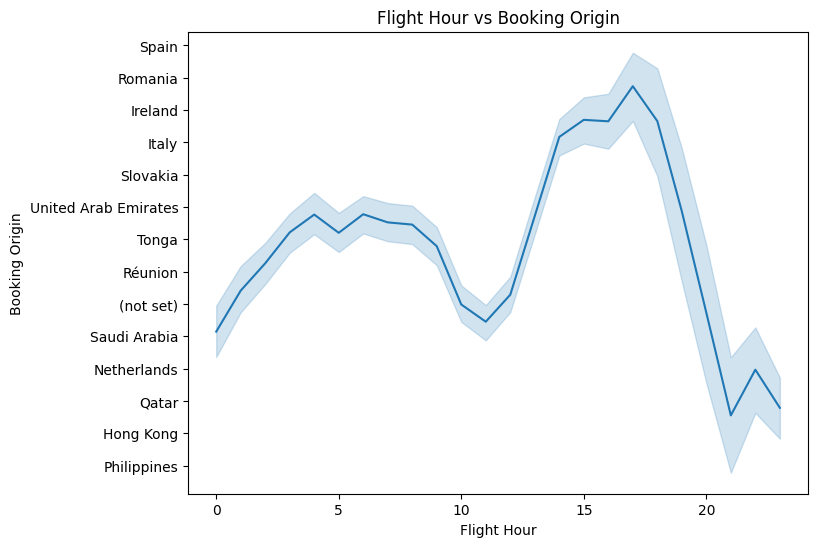

In [22]:
# Scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x="purchase_lead", y="flight_day")
plt.xlabel("Purchase Lead Time")
plt.ylabel("Flight Day")
plt.title("Purchase Lead Time vs Flight Day")
plt.show()

# Line plot
plt.figure(figsize=(8, 6))
sns.lineplot(data=df, x="flight_hour", y="booking_origin")
plt.xlabel("Flight Hour")
plt.ylabel("Booking Origin")
plt.title("Flight Hour vs Booking Origin")
plt.show()


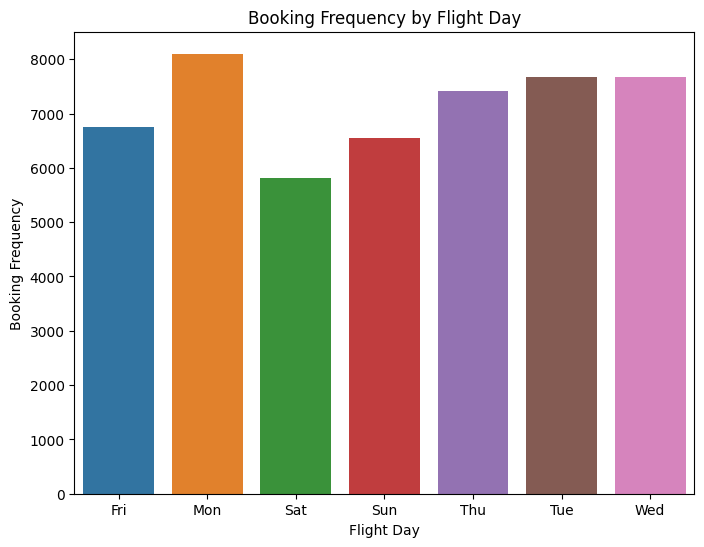

In [23]:
# Count the number of bookings for each flight day
booking_counts = df["flight_day"].value_counts().sort_index()

# Create a bar plot for booking frequency
plt.figure(figsize=(8, 6))
sns.barplot(x=booking_counts.index, y=booking_counts.values)
plt.xlabel("Flight Day")
plt.ylabel("Booking Frequency")
plt.title("Booking Frequency by Flight Day")
plt.show()